In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Save the DataFrame to a CSV file
processed_data_path = Path("data/processed/running_data.csv")

df = pd.read_csv(processed_data_path)

# Convert 'date' column to datetime
df["date_and_time"] = pd.to_datetime(df["date_and_time"])

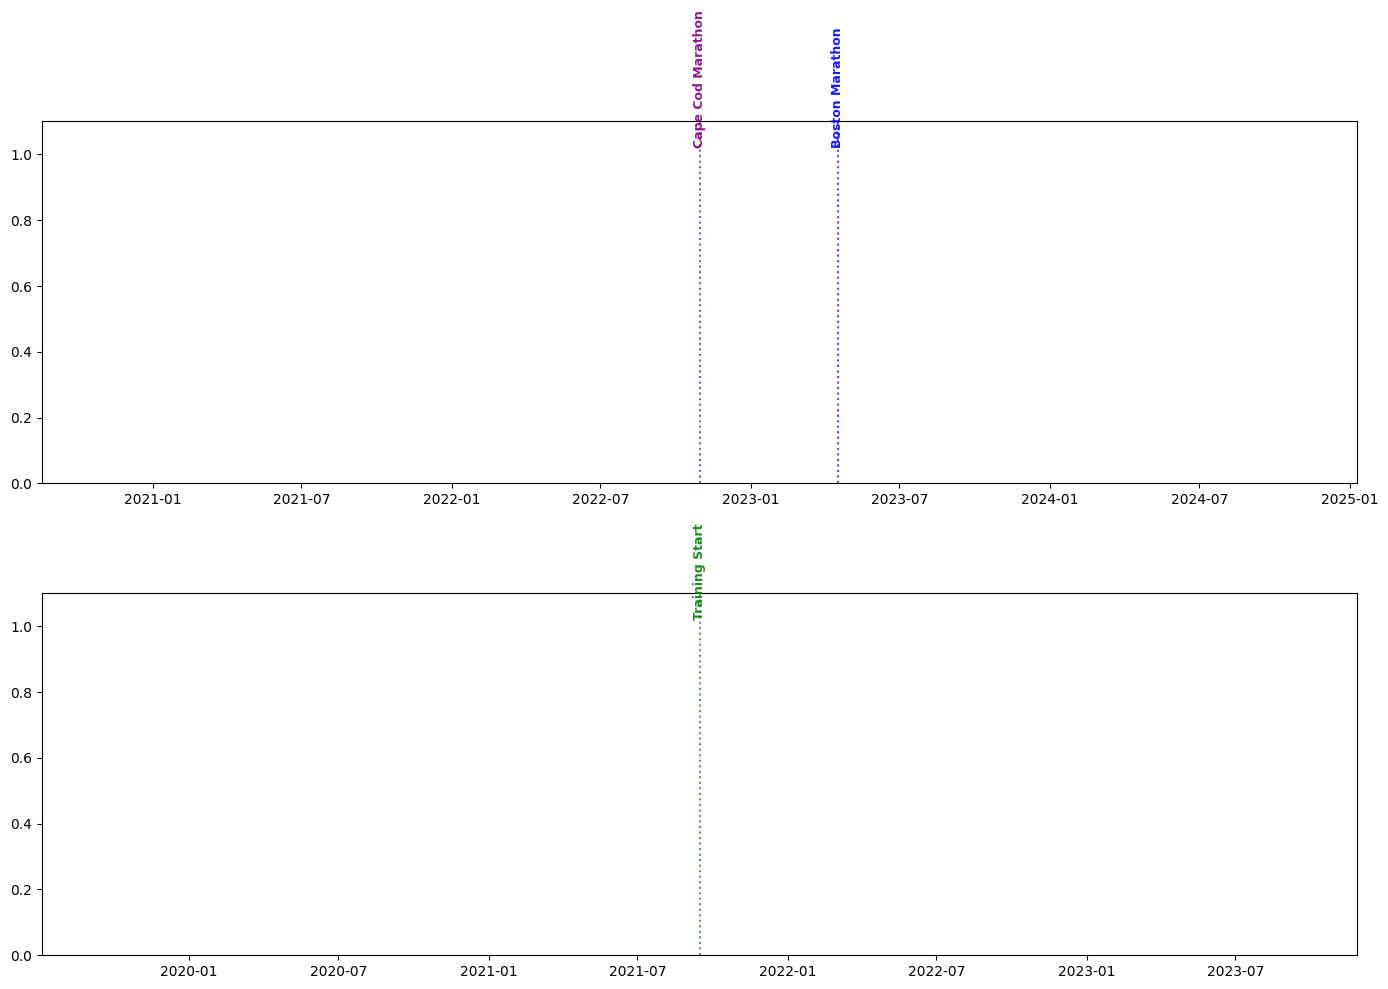

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.dates import DateFormatter
from datetime import datetime


# Function to add event markers
def add_event(
    ax, event_date, label, color="purple", linestyle=":", alpha=0.7, text_offset=0.02
):
    """
    Add a vertical line at a specific date with a label.

    Parameters:
    -----------
    ax : matplotlib.axes.Axes
        The axis to add the event line to
    event_date : str or datetime
        The date of the event (can be string in format 'YYYY-MM-DD' or datetime object)
    label : str
        The label for the event
    color : str
        Color of the line and text
    linestyle : str
        Style of the vertical line
    alpha : float
        Transparency of the line
    text_offset : float
        Vertical offset for the text as a fraction of the y-axis range
    """
    # Convert string to datetime if needed
    if isinstance(event_date, str):
        event_date = pd.to_datetime(event_date)

    # Get y-axis limits
    ymin, ymax = ax.get_ylim()
    y_range = ymax - ymin

    # Draw the vertical line
    ax.axvline(x=event_date, color=color, linestyle=linestyle, alpha=alpha)

    # Add the rotated text label
    # Position it slightly above the top of the chart
    text_y = ymax + (y_range * text_offset)
    ax.text(
        x=event_date,
        y=text_y,
        s=label,
        rotation=90,
        color=color,
        ha="center",
        va="bottom",
        alpha=alpha + 0.2,
        fontsize=9,
        fontweight="bold",
    )


# Load and prepare data (as in previous code)
# ...

# Create the plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot weekly and monthly distances (as in previous code)
# ...

# Example usage:
add_event(ax1, "2022-10-30", "Cape Cod Marathon")
add_event(ax1, "2023-04-17", "Boston Marathon", color="blue")

# You can also add events to the monthly plot
add_event(ax2, "2021-09-15", "Training Start", color="green")

# Adjust the plot limits to make room for labels
ax1.set_ylim(0, ax1.get_ylim()[1] * 1.1)  # Add 10% space at top
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.1)

plt.tight_layout()
plt.show()

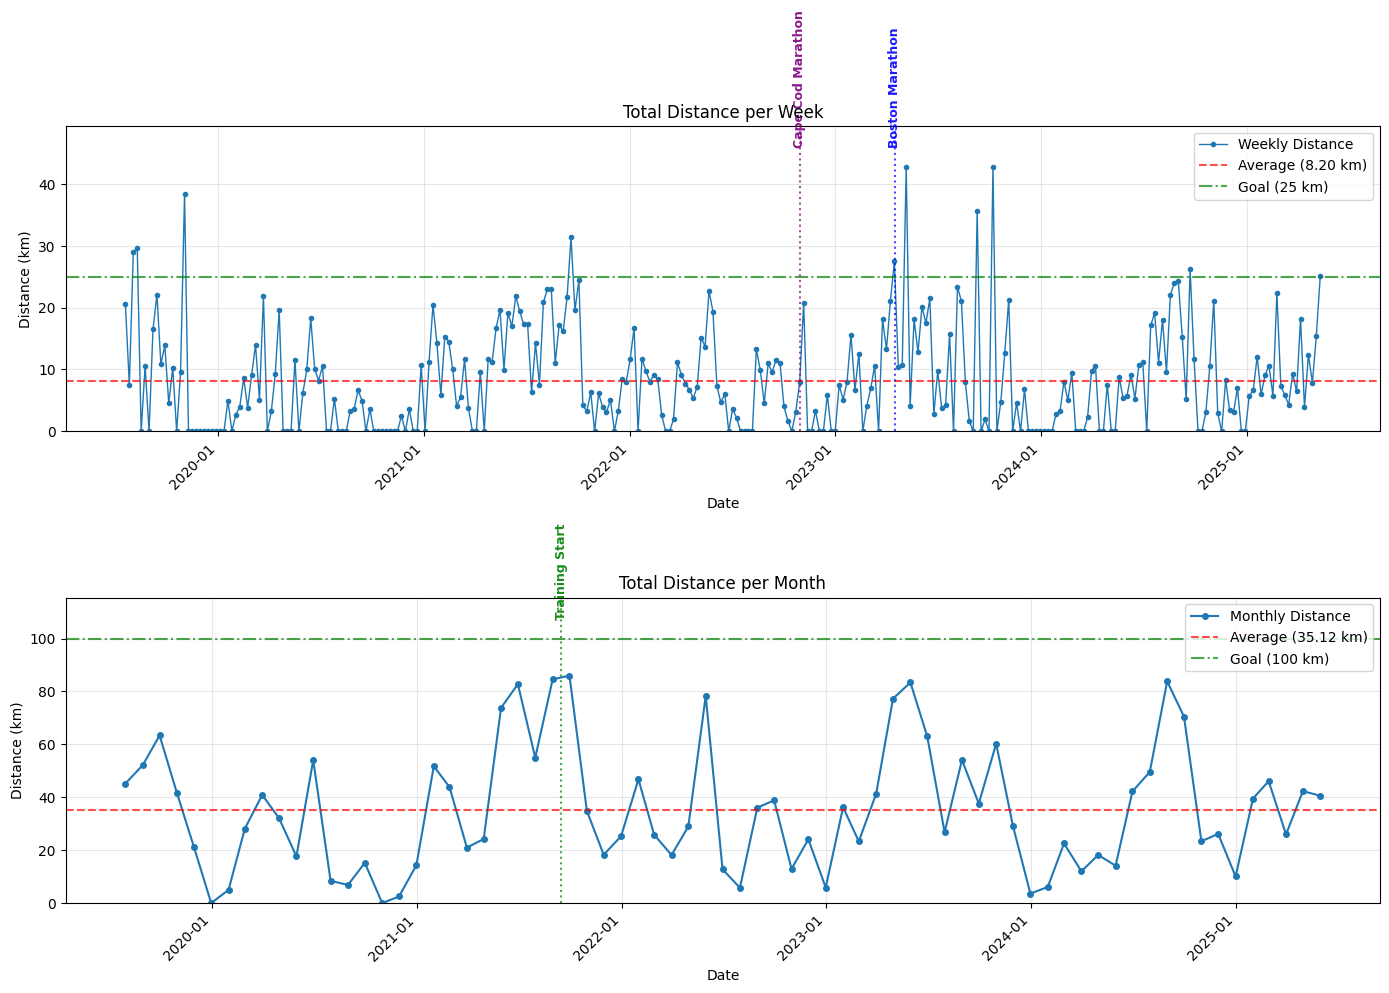

In [13]:
# Weekly aggregation using resample
weekly_distance = (
    df.set_index("date_and_time")["distance"].resample("W").sum().reset_index()
)

# Monthly aggregation
monthly_distance = (
    df.set_index("date_and_time")["distance"].resample("ME").sum().reset_index()
)

# Calculate averages
weekly_avg = weekly_distance["distance"].mean()
monthly_avg = monthly_distance["distance"].mean()

# Set goals
weekly_goal = 25  # 25 km per week
monthly_goal = 100  # 100 km per month

# Create plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Weekly plot - line plot with markers
ax1.plot(
    weekly_distance["date_and_time"],
    weekly_distance["distance"],
    marker="o",
    markersize=3,
    linestyle="-",
    linewidth=1,
    label="Weekly Distance",
)

# Add average line for weekly plot
ax1.axhline(
    y=weekly_avg,
    color="r",
    linestyle="--",
    alpha=0.7,
    label=f"Average ({weekly_avg:.2f} km)",
)

# Add goal line for weekly plot
ax1.axhline(
    y=weekly_goal,
    color="g",
    linestyle="-.",
    alpha=0.7,
    label=f"Goal ({weekly_goal} km)",
)

ax1.set_title("Total Distance per Week")
ax1.set_xlabel("Date")
ax1.set_ylabel("Distance (km)")
ax1.legend(loc="best")
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")

# Monthly plot - line plot with markers
ax2.plot(
    monthly_distance["date_and_time"],
    monthly_distance["distance"],
    marker="o",
    markersize=4,
    linestyle="-",
    linewidth=1.5,
    label="Monthly Distance",
)

# Add average line for monthly plot
ax2.axhline(
    y=monthly_avg,
    color="r",
    linestyle="--",
    alpha=0.7,
    label=f"Average ({monthly_avg:.2f} km)",
)

# Add goal line for monthly plot
ax2.axhline(
    y=monthly_goal,
    color="g",
    linestyle="-.",
    alpha=0.7,
    label=f"Goal ({monthly_goal} km)",
)

ax2.set_title("Total Distance per Month")
ax2.set_xlabel("Date")
ax2.set_ylabel("Distance (km)")
ax2.legend(loc="best")
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right")

# Add grid for readability
ax1.grid(True, alpha=0.3)
ax2.grid(True, alpha=0.3)

# Format x-axis date labels to be more readable
ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
ax2.xaxis.set_major_formatter(DateFormatter("%Y-%m"))

# Example usage:
add_event(ax1, "2022-10-30", "Cape Cod Marathon")
add_event(ax1, "2023-04-17", "Boston Marathon", color="blue")

# You can also add events to the monthly plot
add_event(ax2, "2021-09-15", "Training Start", color="green")

# Adjust the plot limits to make room for labels
ax1.set_ylim(0, ax1.get_ylim()[1] * 1.1)  # Add 10% space at top
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.1)

plt.tight_layout()
plt.show()